<a href="https://colab.research.google.com/github/gontay/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is just my attempt to understand NLP and explore Language with ML and NN.

Goals:
1. Identify optimal format for speech samples.
2. Identify medium of data for learning raw unprocessed vs image(Spectogram and Waveform)
3. Apply NN or ML
4. Get emotional tone from soundbite

# Theory Crafting

## Analog Audio
Analog Audio is hard to explain b'cos I'm small brained. But essentially the sounds are not processed in anyway by a computer so in theory you just get the sound as it is. Imagine this sentence as a smooth line with of word going into your ear.

`"I am a bad explainer of things but I try my best."`

## Digital Audio
Digital Audio is audio but digital. So digital introduces a hypotetical information lost due to the limitation computers. Imagine that the sentence took 10 seconds to complete and you took 1 small sample every second for this example. It would look something like this.

`"I a ad expl of ings ut I tr m est"`

### *Sampling Rate*
Now what if I take more samples every second? I collect more information as I have more samples in each second. So I it might look something like this:

`"I m a bd explain of thing bu I tr my bes"`

# Code for Audio Input

In [ ]:
## Record and playback
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [17]:
##Record and save
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record_save(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  with open('audio.wav','wb') as f:
    f.write(b)
  return 'audio.wav'  # or webm ?

<IPython.core.display.Javascript object>

<ipython-input-2-2d0313352e31>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


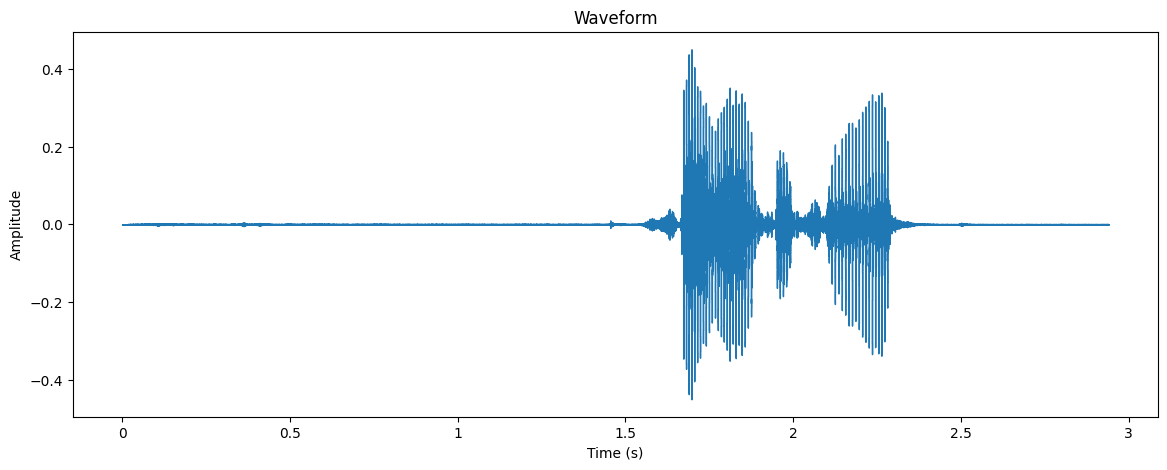

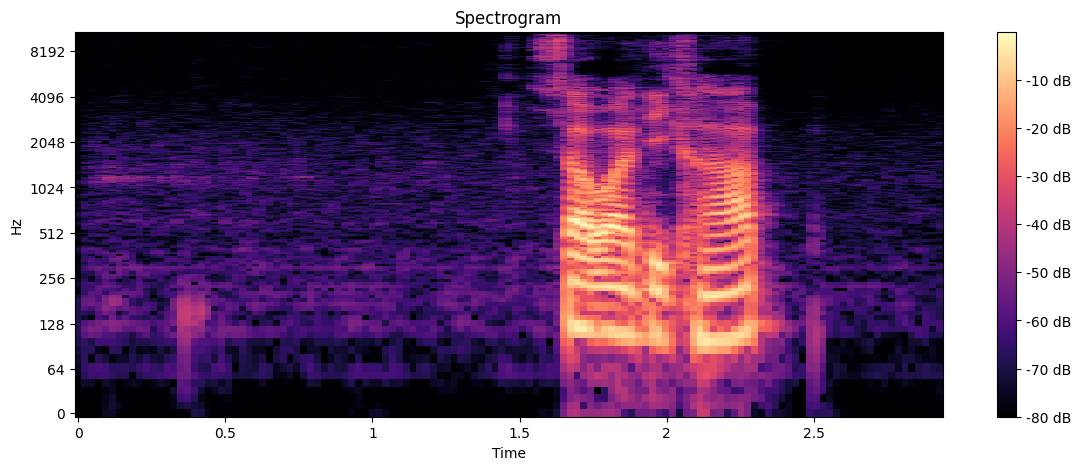

In [36]:
##Input Wave Recording and output visualisation
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio

def visualise_audio(audio_file='audio.wav'):
  y, sr = librosa.load(audio_file)

  plt.figure(figsize=(12,4))
  librosa.display.waveshow(y, sr=sr)
  plt.title('Waveform')
  plt.show('Time (s)')
  plt.ylabel('Amp')
  plt.show()

  D = librosa.stft(y)
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

  plt.figure(figsize=(12,4))
  librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
  plt.title('Spectogram')
  plt.colorbar(format='%+2.0f dB')
  plt.show()

record_save(3)
visualize_audio('audio.wav')
Audio('audio.wav', autoplay=True)